# Train VAE

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import ast
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings(action='ignore')

sys.path.append("../../")
from functions import vae, utils

from numpy.random import seed
randomState = 123
seed(randomState)

Using TensorFlow backend.


In [ ]:
# Read in config variables
config_file = os.path.abspath(os.path.join(os.getcwd(),"../../configs", "config_Human_experiment.tsv"))
params = utils.read_config(config_file)

In [ ]:
# Load parameters
dataset_name = params['dataset_name']

In [2]:
# Load arguments
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../.."))

normalized_data_file = os.path.join(
    base_dir,
    dataset_name,
    "data",
    "input",
    "recount2_gene_normalized_data.tsv.xz")

directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/data
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/models
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/data/encoded
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output/stats
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output/viz


In [4]:
# Read data
normalized_data = pd.read_table(
    normalized_data_file,
    header=0,
    sep='\t',
    index_col=0).T

print(normalized_data.shape)

(896, 58037)


In [5]:
# VAE Parameters 
learning_rate = 0.001
batch_size = 100
epochs = 40
kappa = 0.01
intermediate_dim = 2500
latent_dim = 30
epsilon_std = 1.0
train_architecture = "NN_{}_{}".format(intermediate_dim, latent_dim)

In [6]:
# Create analysis output directories
output_dirs = [os.path.join(base_dir, dataset_name, "models"),
             os.path.join(base_dir, dataset_name, "logs")
             ]

# Check if analysis output directory exist otherwise create
for each_dir in output_dirs:
    if os.path.exists(each_dir):
        print('directory already exists: {}'.format(each_dir))
    else:
        print('creating new directory: {}'.format(each_dir))
    os.makedirs(each_dir, exist_ok=True)
    

# Check if NN architecture directory exist otherwise create
for each_dir in output_dirs:
    new_dir = os.path.join(each_dir, train_architecture)
    
    if os.path.exists(new_dir):
        print('directory already exists: {}'.format(new_dir))
    else:
        print('creating new directory: {}'.format(new_dir))
    os.makedirs(new_dir, exist_ok=True)

directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/data/encoded/NN_2500_30
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/models/NN_2500_30
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output/stats/NN_2500_30
directory already exists: /home/alexandra/Documents/Repos/Batch_effects_simulation/output/viz/NN_2500_30


Train on 806 samples, validate on 90 samples
Epoch 1/20
806/806 [==============================] - 65s 80ms/step - loss: 22944.5645 - val_loss: 8588.9424
Epoch 2/20
806/806 [==============================] - 53s 66ms/step - loss: 7798.0927 - val_loss: 7594.9141
Epoch 3/20
806/806 [==============================] - 55s 68ms/step - loss: 7387.7928 - val_loss: 6647.7827
Epoch 4/20
806/806 [==============================] - 56s 70ms/step - loss: 6940.6688 - val_loss: 6044.8779
Epoch 5/20
806/806 [==============================] - 53s 66ms/step - loss: 6643.5032 - val_loss: 5841.0771
Epoch 6/20
806/806 [==============================] - 54s 67ms/step - loss: 6153.9287 - val_loss: 5806.5327
Epoch 7/20
806/806 [==============================] - 56s 70ms/step - loss: 5938.6911 - val_loss: 5689.1904
Epoch 8/20
806/806 [==============================] - 57s 70ms/step - loss: 5812.0207 - val_loss: 5642.5015
Epoch 9/20
806/806 [==============================] - 55s 68ms/step - loss: 5732.7445 - va

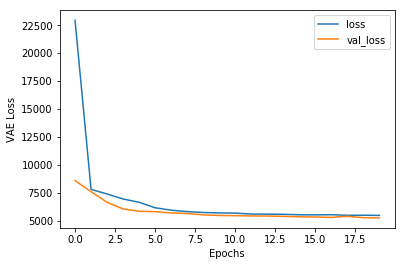

In [7]:
# Train (VAE)
vae.tybalt_2layer_model(learning_rate,
                        batch_size,
                        epochs, 
                        kappa, 
                        intermediate_dim,
                        latent_dim, 
                        epsilon_std,
                        normalized_data,
                        base_dir, 
                        dataset_name,
                        train_architecture)